In [451]:
import pandas as pd
pd.__version__

'1.5.3'

In [452]:
data = pd.read_csv('data.csv')
data

,Mois,Accenteur mouchet,Corneille noire,Fauvette à tête noire,Geai des chênes,Goéland argenté,Grimpereau des jardins,Grive musicienne,Merle noir,Mésange bleue,...,Pigeon biset,Pigeon ramier,Pinson des arbres,Pouillot véloce,Roitelet huppé,Roitelet à triple bandeau,Rougegorge familier,Sittelle torchepot,Troglodyte mignon,Étourneau sansonnet
0,janvier,1,22,0,4,0,3,1,22,16,...,1,37,3,0,4,0,14,0,5,33
1,fevrier,1,9,0,3,0,4,1,13,7,...,1,8,3,1,2,0,6,2,4,7
2,mars,0,25,6,2,1,7,3,24,16,...,17,24,11,3,1,2,9,2,10,16
3,avril,3,7,8,2,0,2,0,12,7,...,3,10,3,2,0,1,1,0,5,35
4,mai,0,7,10,1,0,5,0,24,4,...,8,9,6,4,0,0,11,0,7,48
5,juin,0,15,11,1,0,5,0,23,8,...,3,25,5,2,6,0,11,0,12,75
6,juillet,0,10,3,2,0,5,0,11,6,...,4,13,3,1,4,0,4,0,2,2
7,aout,6,21,1,1,0,2,0,17,10,...,7,14,0,1,0,0,10,0,5,0
8,septembre,2,15,1,1,0,5,0,10,11,...,2,32,1,0,0,5,12,3,5,0
9,octobre,0,6,0,1,0,1,1,4,4,...,1,34,0,0,0,2,6,2,1,0


## Analyse préliminaire

In [453]:
# Combien d'individus toute espèce confondue ont été observés dans le parc ?
total_individuals = data.sum(numeric_only=True).sum() #numeric only permet d'exclure la colonne des mois
print("Nombre total d'individus: ", total_individuals)

Nombre total d'individus:  1672


In [454]:
# Quelle espèce a été la plus observée dans l’année
max_individuals = data.sum(numeric_only=True).max()
max_individuals_species = data.sum(numeric_only=True).idxmax()
print("Espèce la plus observée: ", max_individuals_species, "avec ", max_individuals, "individus")

Espèce la plus observée:  Pigeon ramier avec  232 individus


In [455]:
#  Quelle espèce a été la moins observée dans l’année
min_individuals = data.sum(numeric_only=True).min()
min_individuals_species = data.sum(numeric_only=True).idxmin()
print("Espèce la moins observée: ", min_individuals_species, "avec ", min_individuals, "individus")

Espèce la moins observée:  Goéland argenté avec  1 individus


### Espèces absentes
On remarques que des valeurs sont égales à zero pour certaines espèces. 
On en déduit que ces espèces n'ont pas été observées assez souvent pour représenter un intérêt pour l'analyse.
On va donc les supprimer du dataset.

In [456]:
# Supprimer les colonnes qui contiennent zéro
colonnes_supprimees = data.columns[data.eq(0).any()]
data_sans_zeros = data.drop(colonnes_supprimees, axis=1)

# Afficher les noms des colonnes supprimées
noms_colonnes_supprimees = colonnes_supprimees.tolist()
print(len(noms_colonnes_supprimees), " Colonnes supprimées :", noms_colonnes_supprimees)

15  Colonnes supprimées : ['Accenteur mouchet', 'Fauvette à tête noire', 'Goéland argenté', 'Grive musicienne', 'Mésange huppée', 'Mésange noire', 'Mésange à longue queue', 'Pic vert', 'Pic épeiche', 'Pinson des arbres', 'Pouillot véloce', 'Roitelet huppé', 'Roitelet à triple bandeau', 'Sittelle torchepot', 'Étourneau sansonnet']


### Analyse des éspèces significatives
Après avoir supprimé les espèces on va pouvoir analyser les espèces qui sont significatives. En commencant par la variance des espèces.

In [457]:
# Calculer la variance pour chaque espèce
variance = data_sans_zeros.var(numeric_only=True)
print("Variance pour chaque espèce:\n", variance)

Variance pour chaque espèce:
 Corneille noire            49.174242
Geai des chênes             2.446970
Grimpereau des jardins      3.515152
Merle noir                 54.446970
Mésange bleue              17.333333
Mésange charbonnière       31.696970
Perruche à collier         30.568182
Pie bavarde                21.295455
Pigeon biset               23.477273
Pigeon ramier             119.151515
Rougegorge familier        22.272727
Troglodyte mignon          10.992424
dtype: float64


In [458]:
# Quelle est l'éspèce qui a la plus grande variance ?
max_variance = variance.max()
max_variance_species = variance.idxmax()
print("Espèce avec la plus grande variance: ", max_variance_species, "avec {0:.3f}".format(max_variance), "de variance")

Espèce avec la plus grande variance:  Pigeon ramier avec 119.152 de variance


In [459]:
# Quelle est l'éspèce qui a la plus petite variance ?
min_variance = variance.min()
min_variance_species = variance.idxmin()
print("Espèce avec la plus petite variance: ", min_variance_species, "avec {0:.3f}".format(min_variance), "de variance")

Espèce avec la plus petite variance:  Geai des chênes avec 2.447 de variance


### Étude particulière des perruches à collier.

In [460]:
# Extraire les stats pour les peruches
observation_perruches = data[['Mois', 'Perruche à collier']]
observation_perruches

,Mois,Perruche à collier
0,janvier,18
1,fevrier,2
2,mars,16
3,avril,7
4,mai,9
5,juin,13
6,juillet,4
7,aout,2
8,septembre,12
9,octobre,4


,Perruche à collier
count,12.00000
mean,8.25000
std,5.52885
min,2.00000
25%,3.75000
50%,8.00000
75%,12.25000
max,18.00000


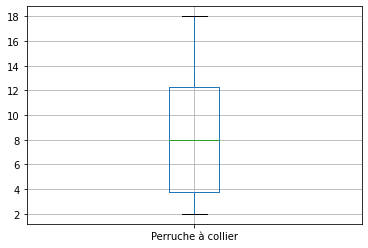

In [461]:
# boxplot
observation_perruches.boxplot()
observation_perruches.describe()

TODO: Commentaires sur l'histogramme des perruches à collier.

C:\Users\Hadouin\AppData\Local\Temp\ipykernel_27800\4108336320.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyenne_par_mois = data_sans_perruches.mean(axis=1)


<Axes: >

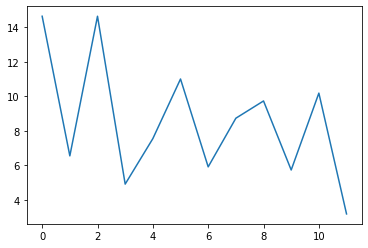

In [462]:
# On supprime la colonne des perruches à collier
data_sans_perruches = data_sans_zeros.drop(['Perruche à collier'], axis=1)
# On calcule la moyenne par mois
moyenne_par_mois = data_sans_perruches.mean(axis=1)
moyenne_par_mois.name = 'Moyenne générale'

# Plot de la moyenne générale par mois
moyenne_par_mois.plot()

<Axes: xlabel='Mois'>

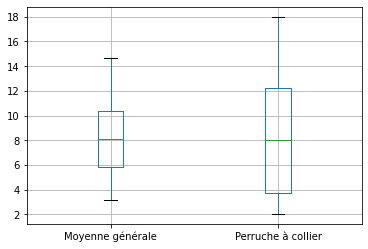

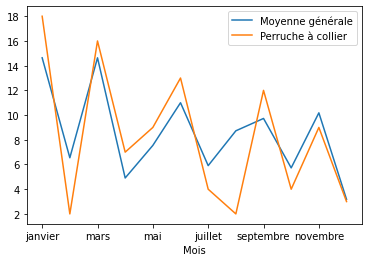

In [463]:
# ajouter la column des perruches à collier à la moyenne par mois
moyenne_par_mois_plus_perruches = pd.concat([moyenne_par_mois, observation_perruches['Perruche à collier']], axis=1)
# Changer les valeurs au nom des mois qui est le contenu de la colonne 'Mois'
moyenne_par_mois_plus_perruches.index = data['Mois']

moyenne_par_mois_plus_perruches.boxplot()
moyenne_par_mois_plus_perruches.plot()

### Comprarer les deux courbes 
TODO: Commentaires sur les deux courbes.
on remarque que les deux courbes sont très proches. 
En revanche on voit qu'au mois d'août il y a une différence entre les deux courbes.
On peut donc en déduire que les perruches à collier sont moins présentes au mois d'août.
Pourquoi ?
- Les perruches à collier sont en vacances.


In [464]:
# Correlation entre perruche et chaque autre espèce
correlation_perruche = data_sans_zeros.corrwith(data_sans_zeros['Perruche à collier'])
correlation_perruche = correlation_perruche.drop(['Perruche à collier'])
print("Correlation entre perruche et chaque autre espèce:\n", correlation_perruche)


Correlation entre perruche et chaque autre espèce:
 Corneille noire           0.620783
Geai des chênes           0.239133
Grimpereau des jardins    0.543741
Merle noir                0.657924
Mésange bleue             0.722741
Mésange charbonnière      0.753500
Pie bavarde               0.738454
Pigeon biset              0.258755
Pigeon ramier             0.641700
Rougegorge familier       0.590548
Troglodyte mignon         0.643477
dtype: float64


C:\Users\Hadouin\AppData\Local\Temp\ipykernel_27800\2219495563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_perruche = data_sans_zeros.corrwith(data_sans_zeros['Perruche à collier'])


In [465]:
# Max correlation a part les perruches
max_correlation = correlation_perruche.max()
max_correlation_species = correlation_perruche.idxmax()
print("Espèce avec la plus grande correlation avec les perruches: ", max_correlation_species, "avec {0:.3f}".format(max_correlation), "de correlation")

Espèce avec la plus grande correlation avec les perruches:  Mésange charbonnière avec 0.754 de correlation


In [466]:
# Min correlation a part les perruches
min_correlation = correlation_perruche.min()
min_correlation_species = correlation_perruche.idxmin()
print("Espèce avec la plus petite correlation avec les perruches: ", min_correlation_species, "avec {0:.3f}".format(min_correlation), "de correlation")

Espèce avec la plus petite correlation avec les perruches:  Geai des chênes avec 0.239 de correlation


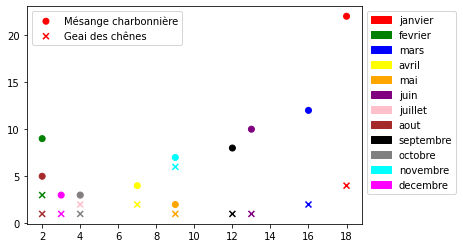

In [467]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
couleurs = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey', 'cyan', 'magenta']

# Pour chaque mois creer un patch de legende
patches = []
for i in range(len(data['Mois'])):
    patches.append(mpatches.Patch(color=couleurs[i], label=data['Mois'][i]))

donnees_selectionnees = data[['Mois', 'Perruche à collier', max_correlation_species, min_correlation_species]]

ax.scatter(x='Perruche à collier', y=max_correlation_species, c=couleurs, data=donnees_selectionnees)
ax.scatter(x='Perruche à collier', y=min_correlation_species, c=couleurs, data=donnees_selectionnees, marker='x')
legend1 = ax.legend([max_correlation_species, min_correlation_species], loc='upper left');
plt.gca().add_artist(legend1)


ax.legend(handles=patches, bbox_to_anchor=(1, 1))

TODO: Commentaires sur les deux courbes.

## Analyse en Composante Principale (ACP)
https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html

In [468]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler

data_sans_zeros_sans_mois = data_sans_zeros.drop(['Mois'], axis=1)
normalized_data = normalize(data_sans_zeros_sans_mois)
scaled_data = StandardScaler().fit_transform(normalized_data)

idx = ["mean", "std"]

pd.DataFrame(scaled_data).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04,1.04


In [469]:
pca = PCA()
pca.fit_transform(scaled_data)

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.682987e+00,28.0,28.0
1,Dim2,2.524966e+00,19.0,47.0
2,Dim3,1.864313e+00,14.0,62.0
3,Dim4,1.541388e+00,12.0,73.0
4,Dim5,9.667574e-01,7.0,81.0
5,Dim6,9.504724e-01,7.0,88.0
6,Dim7,8.153122e-01,6.0,94.0
7,Dim8,4.612423e-01,4.0,98.0
8,Dim9,1.492756e-01,1.0,99.0
9,Dim10,1.296302e-01,1.0,100.0


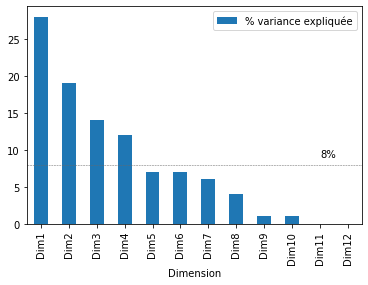

In [470]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(10, 9, "8%") # ajout de texte
plt.axhline(y = 8, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 8 = 100 / 12 (nb dimensions)
plt.show()

In [471]:
data_pca = pca.transform(data_sans_zeros_sans_mois)
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0], 
    "Dim2" : data_pca[:,1],
    "Specie": data_sans_zeros_sans_mois.columns
})

data_pca_df

c:\Users\Hadouin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Dim1,Dim2,Specie
0,-14.982032,-15.406194,Corneille noire
1,-13.564893,-4.318980,Geai des chênes
2,-26.715520,-7.875042,Grimpereau des jardins
3,-8.445644,-0.419141,Merle noir
4,-16.641437,9.494101,Mésange bleue
5,-14.724576,1.309964,Mésange charbonnière
6,-8.331214,-2.833662,Perruche à collier
7,-14.687641,-3.841084,Pie bavarde
8,-3.461908,-7.460919,Pigeon biset
9,9.944935,-6.346910,Pigeon ramier


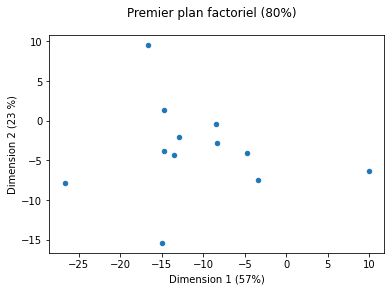

In [472]:
data_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (80%)") # titre général
plt.show()


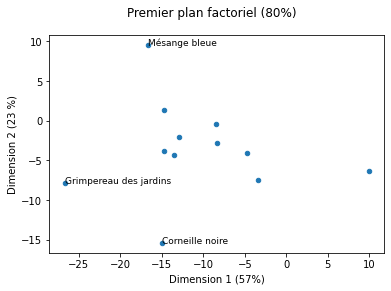

In [473]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 15) | (abs(k[1]['Dim2']) > 8):
        ax.annotate(k[1]["Specie"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (57%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (23 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (80%)") # titre général
plt.show()

In [490]:
x_list = range(1, 12+1)
list(x_list);

pcs = pca.components_;
pcs = pd.DataFrame(pcs, columns=data_sans_zeros_sans_mois.columns)
pcs.index = [f"F{i}" for i in range(12)]
pcs.round(2)

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
F0,-0.27,-0.22,-0.33,-0.40,-0.26,-0.22,-0.07,-0.31,-0.23,0.50,-0.03,-0.30
F1,-0.25,-0.21,0.16,0.40,-0.45,-0.42,0.17,-0.29,-0.01,-0.15,0.22,0.38
F2,0.36,0.24,0.04,-0.03,-0.22,-0.22,-0.49,-0.11,0.23,-0.11,0.54,-0.33
F3,-0.25,0.10,0.23,0.09,-0.30,0.38,-0.24,0.35,-0.61,0.05,0.27,-0.01
F4,0.37,-0.65,-0.42,0.07,0.10,0.11,-0.30,0.07,-0.19,-0.14,0.13,0.27
F5,-0.10,-0.40,0.52,-0.02,0.09,-0.38,-0.40,0.33,0.09,0.07,-0.32,-0.16
F6,0.12,0.35,-0.01,0.25,0.13,-0.09,-0.45,-0.46,-0.36,0.01,-0.44,0.18
F7,0.60,-0.09,0.47,-0.13,0.06,-0.05,0.35,-0.16,-0.31,0.35,0.13,0.07
F8,0.09,0.15,0.04,-0.40,-0.37,0.12,-0.22,0.14,0.32,0.26,-0.14,0.63
F9,-0.38,-0.01,0.19,-0.34,0.58,-0.02,-0.17,-0.25,-0.02,-0.03,0.44,0.30


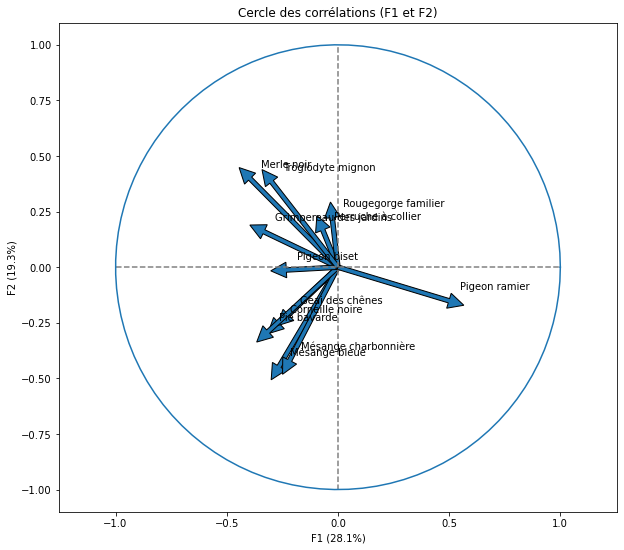

In [493]:
x, y = 0,1

def correlation_graph(pca,x_y,features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

correlation_graph(pca,[0,1],data_sans_zeros_sans_mois.columns)
